In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Electric_Vehicle_Population_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(dataset)

        VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King      Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish      Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King      Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King     Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap    Suquamish    WA      98392.0        2021   
...            ...        ...          ...   ...          ...         ...   
164574  5YJ3E1EA4L  Snohomish     Lynnwood    WA      98087.0        2020   
164575  5YJ3E1EB8J   Kittitas   Ellensburg    WA      98926.0        2018   
164576  WBY33AW08P       King  Woodinville    WA      98072.0        2023   
164577  7SAYGAEE6P       King      Redmond    WA      98053.0        2023   
164578  5YJSA1AG6D  Snohomish     Lynnwood    WA      98087.0        2013   

         Make    Model           Electric Vehicle Type  \
0       TESLA  MO

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164579 entries, 0 to 164578
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         164579 non-null  object 
 1   County                                             164576 non-null  object 
 2   City                                               164576 non-null  object 
 3   State                                              164579 non-null  object 
 4   Postal Code                                        164576 non-null  float64
 5   Model Year                                         164579 non-null  int64  
 6   Make                                               164579 non-null  object 
 7   Model                                              164579 non-null  object 
 8   Electric Vehicle Type                              164579 non-null  object

In [ ]:
dataset.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 324
DOL Vehicle ID                                         0
Vehicle Location                                       5
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

<ipython-input-10-a72653ff9f3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette="rocket")


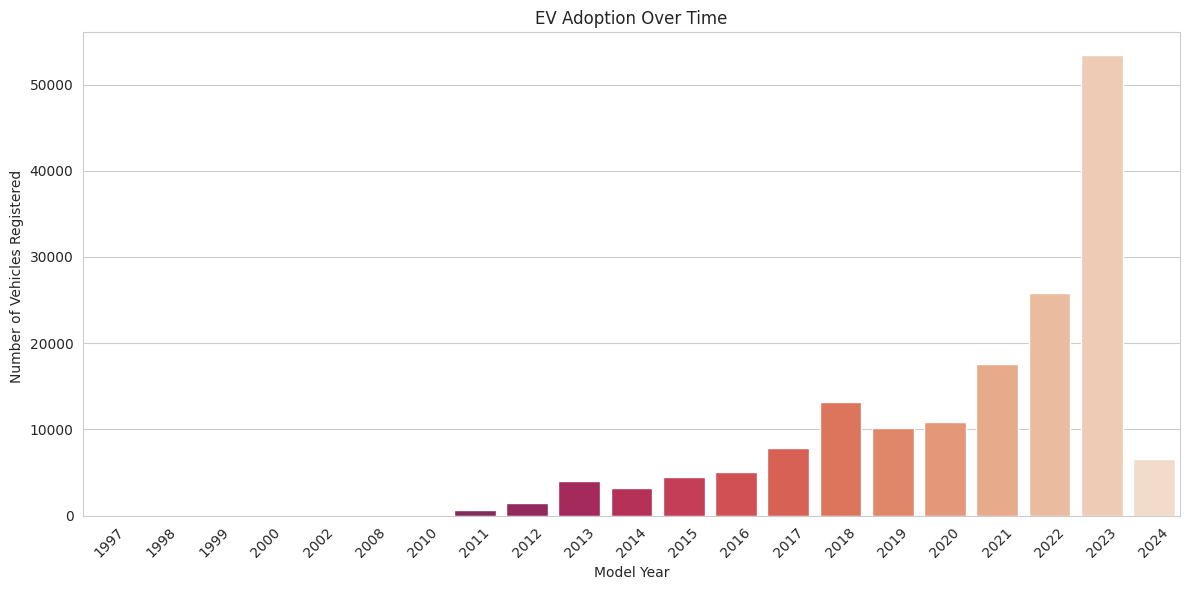

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ev_adoption_by_year = dataset['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette="rocket")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

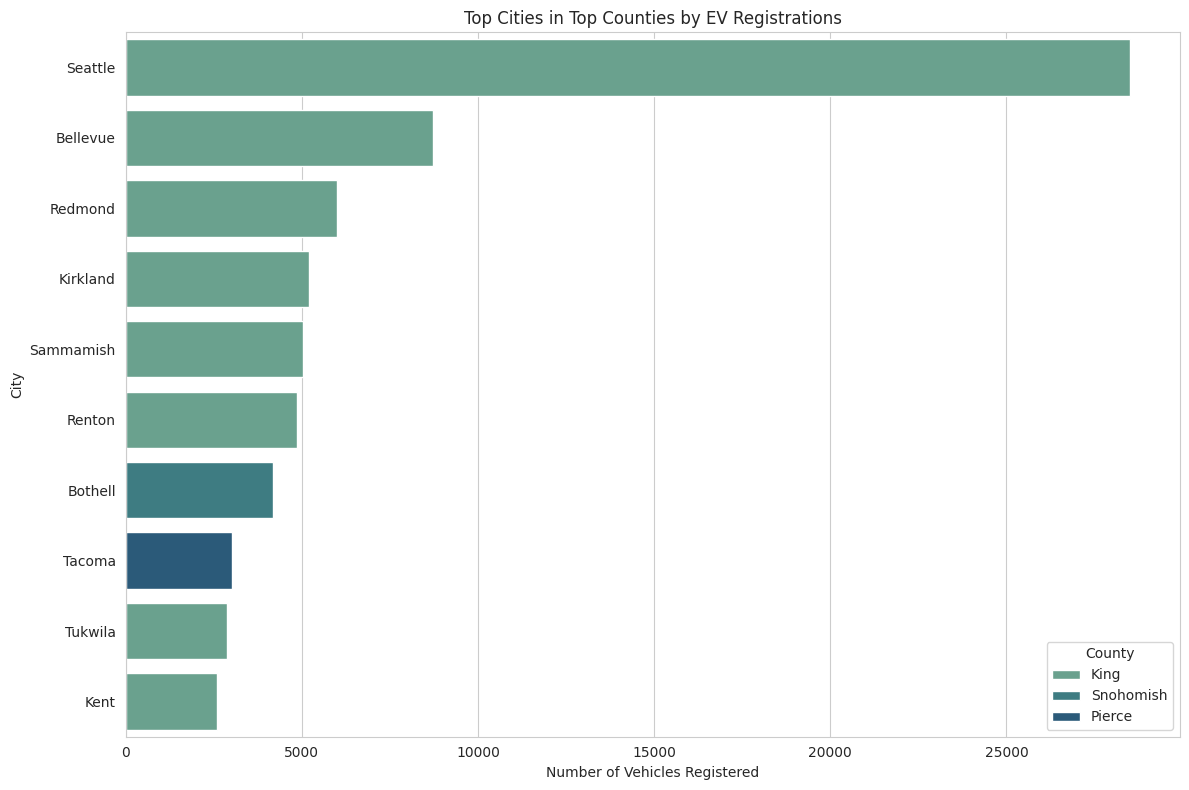

In [ ]:
ev_county_distribution = dataset['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
top_counties_data = dataset[dataset['County'].isin(top_counties)]
ev_city_distribution_top_counties=top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Electric Vehicle Type')
top_cities=ev_city_distribution_top_counties.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x ='Electric Vehicle Type', y='City', hue='County', data=top_cities, palette="crest")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

<ipython-input-27-7d9cbd31cb9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette="magma")


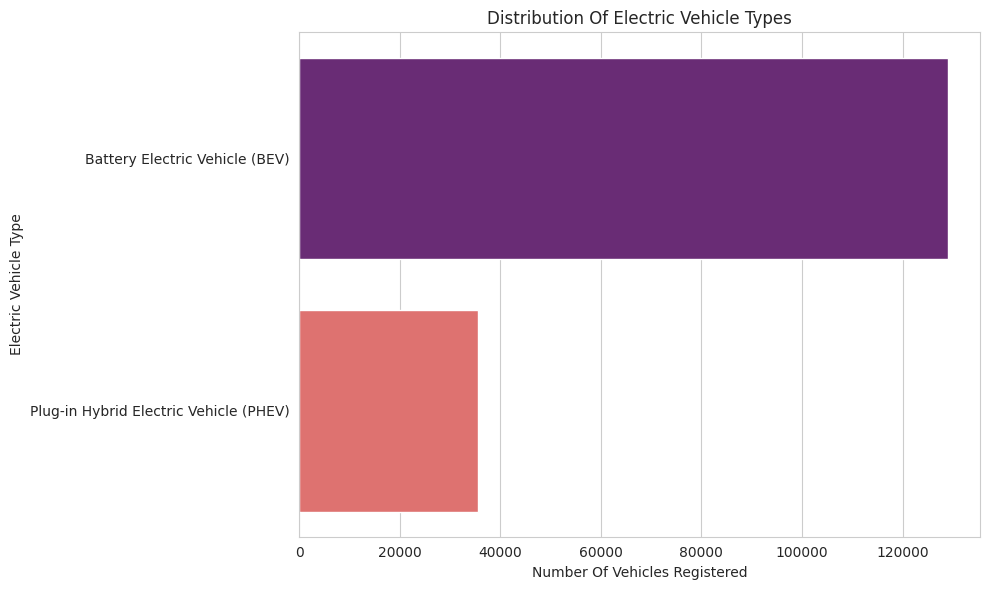

In [ ]:
ev_type_distribution = dataset['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette="magma")
plt.title('Distribution Of Electric Vehicle Types')
plt.xlabel('Number Of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

<ipython-input-29-b016b983dd98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette="cubehelix")


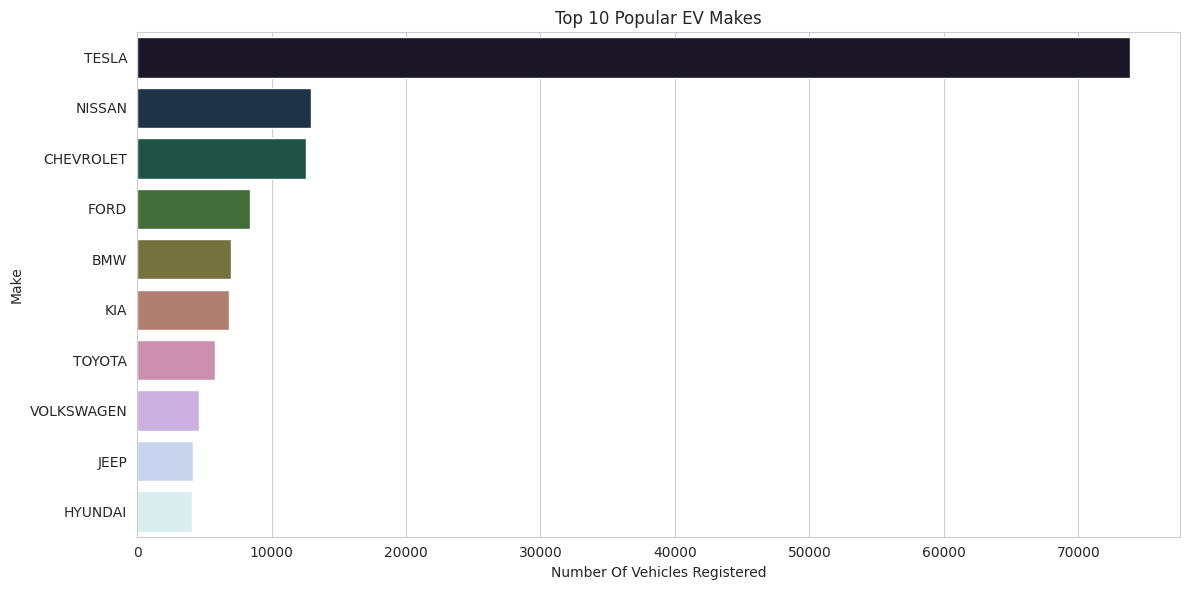

In [ ]:
ev_make_distribution = dataset['Make'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number Of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

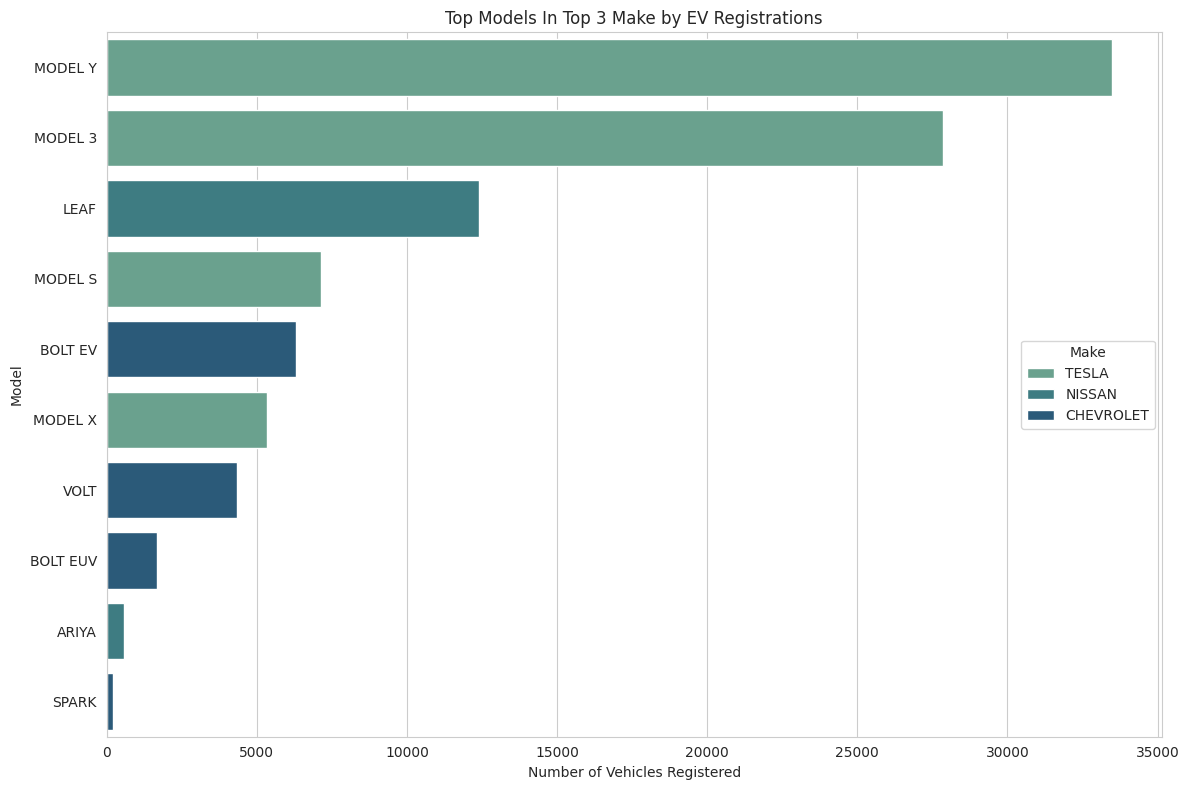

In [ ]:
top_3_makes = ev_make_distribution.head(3).index
top_makes_data = dataset[dataset['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Electric Vehicle Type')
top_models = ev_model_distribution_top_makes.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x ='Electric Vehicle Type', y='Model', hue='Make', data=top_models, palette="crest")
plt.title('Top Models In Top 3 Make by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

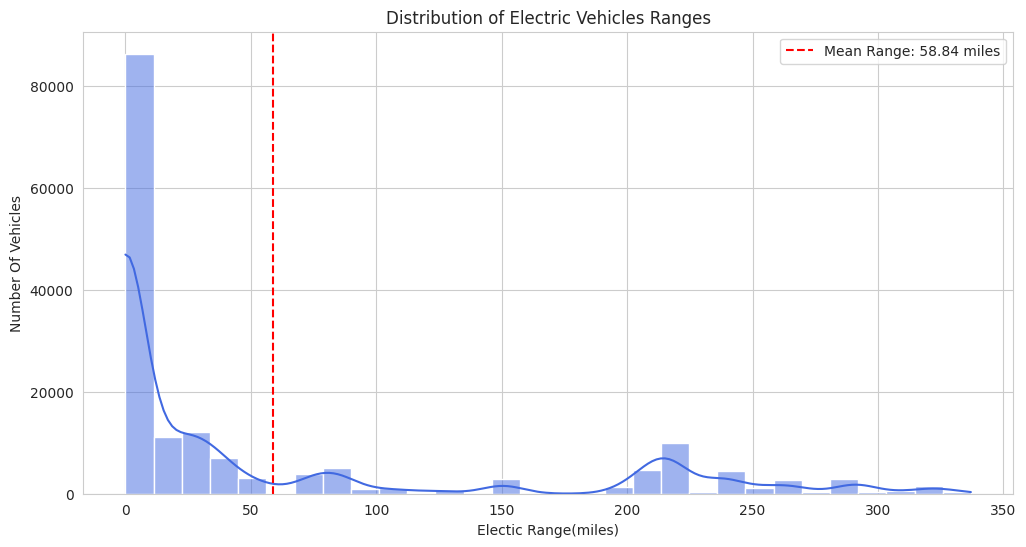

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(dataset['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('Distribution of Electric Vehicles Ranges')
plt.xlabel('Electic Range(miles)')
plt.ylabel('Number Of Vehicles')
plt.axvline(dataset['Electric Range'].mean(),color='red',linestyle='--',label=f'Mean Range: {dataset["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()


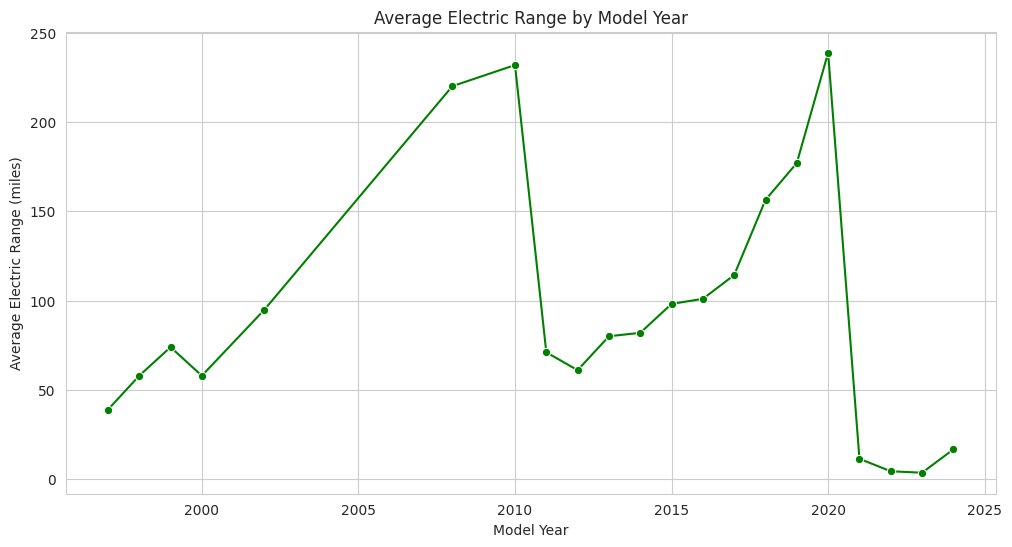

In [ ]:
average_range_by_year = dataset.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

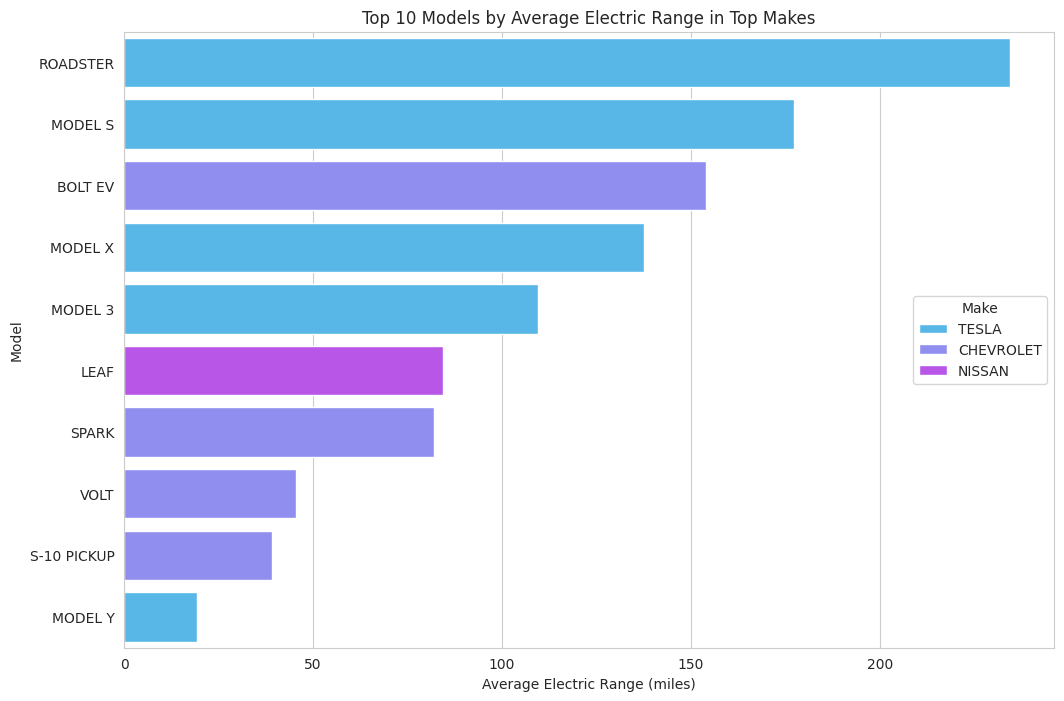

In [ ]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()


top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [ ]:
ev_registration_counts = dataset['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        4
2000        7
2002        2
2008       20
2010       22
2011      714
2012     1488
2013     4046
2014     3199
2015     4438
2016     5091
2017     7839
2018    13243
2019    10153
2020    10894
2021    17643
2022    25796
2023    53382
2024     6596
Name: Model Year, dtype: int64

In [ ]:
from scipy.optimize import curve_fit



filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]


def exp_growth(x, a, b):
    return a * np.exp(b * x)


x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values


params, covariance = curve_fit(exp_growth, x_data, y_data)


forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)


forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 73522.95182226977, 2025: 111340.71502194714, 2026: 168610.67890154442, 2027: 255338.40908095273, 2028: 386676.001643184, 2029: 585569.2873818924}


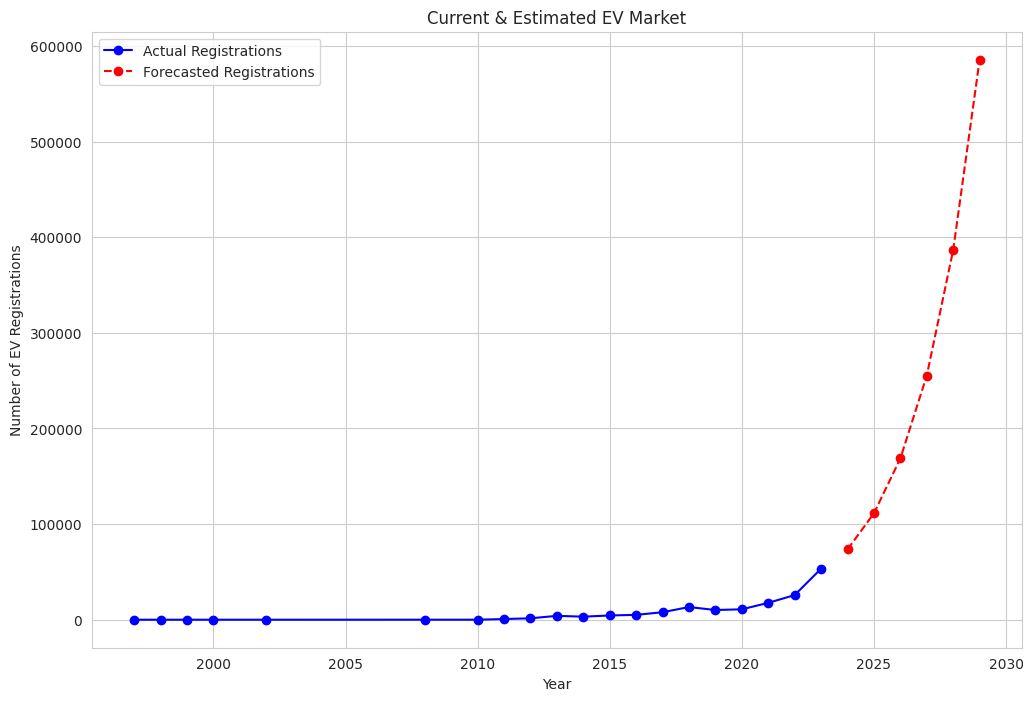

In [ ]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)


actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()